In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

Converting the data into a dataframe

In [2]:
df= pd.read_csv('train.csv')

Getting a preview of the data

In [3]:
df.head()

,ID,electricity_kwh_per_month,natural_gas_therms_per_month,vehicle_miles_per_month,house_area_sqft,water_usage_liters_per_day,public_transport_usage_per_week,household_size,home_insulation_quality,meat_consumption_kg_per_week,laundry_loads_per_week,recycles_regularly,composts_organic_waste,uses_solar_panels,energy_efficient_appliances,heating_type,diet_type,owns_pet,smart_thermostat_installed,carbon_footprint
0,0xd6c,759.70,55.95,944.55,2422.07,541.27,1,3,2,4.23,9,1.0,0.0,0,1.0,gas,vegetarian,1,NaN,830.10
1,0x3fdf,387.06,70.59,1280.85,1995.3,280.39,1,2,1,3.27,8,0.0,0.0,0,0.0,electric,vegetarian,0,0.0,963.08
2,0x3b08,594.25,29.14,1005.72,2673.55,416.14,0,2,3,2.87,3,0.0,1.0,0,1.0,electric,omnivore,1,1.0,840.11
3,0x31e5,503.76,74.68,1049.46,2994.28,530.13,0,5,1,3.22,9,1.0,0.0,0,0.0,electric,omnivore,1,0.0,1252.42
4,0x397e,549.54,-77.00,756.49,2549.57,604.10,5,4,4,2.92,2,1.0,0.0,0,1.0,electric,vegetarian,0,1.0,580.74


Getting the names of the columns

In [4]:
df.columns

Index(['ID', 'electricity_kwh_per_month', 'natural_gas_therms_per_month',
       'vehicle_miles_per_month', 'house_area_sqft',
       'water_usage_liters_per_day', 'public_transport_usage_per_week',
       'household_size', 'home_insulation_quality',
       'meat_consumption_kg_per_week', 'laundry_loads_per_week',
       'recycles_regularly', 'composts_organic_waste', 'uses_solar_panels',
       'energy_efficient_appliances', 'heating_type', 'diet_type', 'owns_pet',
       'smart_thermostat_installed', 'carbon_footprint'],
      dtype='object')

Finding out the population statistics for the numerical columns

In [5]:
df.describe()

,electricity_kwh_per_month,natural_gas_therms_per_month,vehicle_miles_per_month,water_usage_liters_per_day,public_transport_usage_per_week,home_insulation_quality,meat_consumption_kg_per_week,laundry_loads_per_week,recycles_regularly,composts_organic_waste,uses_solar_panels,energy_efficient_appliances,owns_pet,smart_thermostat_installed,carbon_footprint
count,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,13590.000000,13610.000000,14000.000000,13569.000000,14000.000000,13584.000000,14000.000000
mean,389.866107,47.588121,796.046458,385.497657,3.271357,3.003857,3.008954,5.005571,0.706034,0.393608,0.199571,0.498784,0.500143,0.301899,776.046010
std,119.070653,25.098685,340.217925,127.034232,2.942215,1.147641,1.464928,2.568548,0.455593,0.488568,0.399692,0.500017,0.500018,0.459099,190.432709
min,-99.000000,-99.000000,-1567.182896,-99.000000,-14.000000,-4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,310.000000
25%,325.067500,35.410000,587.525000,322.547500,1.000000,2.000000,1.980000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,631.065000
50%,394.995000,49.205000,792.885000,395.325000,3.000000,3.000000,2.990000,5.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,763.725000
75%,464.440000,62.872500,1003.462500,464.652500,5.000000,4.000000,4.000000,7.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,905.910000
max,786.890000,116.950000,2697.807683,885.940000,17.000000,9.000000,8.440000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1610.000000


Checking the data types of the columns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               14000 non-null  object 
 1   electricity_kwh_per_month        14000 non-null  float64
 2   natural_gas_therms_per_month     14000 non-null  float64
 3   vehicle_miles_per_month          14000 non-null  float64
 4   house_area_sqft                  14000 non-null  object 
 5   water_usage_liters_per_day       14000 non-null  float64
 6   public_transport_usage_per_week  14000 non-null  int64  
 7   household_size                   14000 non-null  object 
 8   home_insulation_quality          14000 non-null  int64  
 9   meat_consumption_kg_per_week     14000 non-null  float64
 10  laundry_loads_per_week           14000 non-null  int64  
 11  recycles_regularly               13590 non-null  float64
 12  composts_organic_w

As we can see above the dataframe has 14000 rows. 

But there are a few columns with less than 14000 non-null values. Meaning they have missing data

Checking to see the columns with null values

In [7]:
df.isna().any()

ID                                 False
electricity_kwh_per_month          False
natural_gas_therms_per_month       False
vehicle_miles_per_month            False
house_area_sqft                    False
water_usage_liters_per_day         False
public_transport_usage_per_week    False
household_size                     False
home_insulation_quality            False
meat_consumption_kg_per_week       False
laundry_loads_per_week             False
recycles_regularly                  True
composts_organic_waste              True
uses_solar_panels                  False
energy_efficient_appliances         True
heating_type                       False
diet_type                          False
owns_pet                           False
smart_thermostat_installed          True
carbon_footprint                   False
dtype: bool

Checking the percentage null values of the columns for the columns with missing data.

Arranging that info in descending order

In [8]:
df.isna().mean()[df.isna().mean() > 0].sort_values(ascending=False)

energy_efficient_appliances    0.030786
smart_thermostat_installed     0.029714
recycles_regularly             0.029286
composts_organic_waste         0.027857
dtype: float64

Since the columns with missing data have 3% missing data or less we will drop these rows with missing data

In [9]:
#creating a list with the columns with missing values
cols_null_rows = list(df.isna().mean()[df.isna().mean() > 0].index)

#dropping the rows with null values
df.dropna(axis=0,subset=cols_null_rows,inplace=True)

Checking to ensure the columns were dropped

In [10]:
df.isna().mean()[df.isna().mean() > 0]

Series([], dtype: float64)

Converting hourse_area_sqft and household_size into floats

In [13]:
# Getting rows with non-numeric values in house_area column
null_rows = pd.to_numeric(df['house_area_sqft'], errors='coerce').isna()
non_numeric_rows_house_area = df[null_rows]
# non_numeric_rows_house_area.index

#dropping the rows with non-numeric values for the house_area column
df.drop(axis=0,index=non_numeric_rows_house_area.index,inplace=True)

In [14]:
# Getting rows with non-numeric values in household_size column
null_rows = pd.to_numeric(df['household_size'], errors='coerce').isna()
non_numeric_rows_household_size = df[null_rows]
# non_numeric_rows_household_size.index

#dropping the rows with non-numeric values for the household_size column
df.drop(axis=0,index=non_numeric_rows_household_size.index,inplace=True)

In [ ]:
#converting the columns to float
df['house_area_sqft'] = df['house_area_sqft'].astype('float')
df['household_size'] = df['household_size'].astype('float')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11708 entries, 1 to 13999
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               11708 non-null  object 
 1   electricity_kwh_per_month        11708 non-null  float64
 2   natural_gas_therms_per_month     11708 non-null  float64
 3   vehicle_miles_per_month          11708 non-null  float64
 4   house_area_sqft                  11708 non-null  float64
 5   water_usage_liters_per_day       11708 non-null  float64
 6   public_transport_usage_per_week  11708 non-null  int64  
 7   household_size                   11708 non-null  float64
 8   home_insulation_quality          11708 non-null  int64  
 9   meat_consumption_kg_per_week     11708 non-null  float64
 10  laundry_loads_per_week           11708 non-null  int64  
 11  recycles_regularly               11708 non-null  float64
 12  composts_organic_w

In [ ]:
#checking the values in heating type column to make sure we only have gas,electric or none.
df['heating_type'].value_counts()

gas         5662
electric    4584
none        1124
_J-vT          1
SlA+a          1
            ... 
/;bqE          1
+my?s          1
l%b?4          1
Ty?8J          1
Z'KVY          1
Name: heating_type, Length: 341, dtype: int64

In [26]:
#finding the rows without gas,electric or none
null_heating_type = df['heating_type'][df['heating_type'].str.contains('gas|electric|none') == False]

#dropping those rows
df['heating_type'] = df['heating_type'].drop(axis=0,index = null_heating_type.index)

In [28]:
#confirming we have the expected values in the column
df['heating_type'].value_counts()

gas         5662
electric    4584
none        1124
Name: heating_type, dtype: int64

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11708 entries, 1 to 13999
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               11708 non-null  object 
 1   electricity_kwh_per_month        11708 non-null  float64
 2   natural_gas_therms_per_month     11708 non-null  float64
 3   vehicle_miles_per_month          11708 non-null  float64
 4   house_area_sqft                  11708 non-null  float64
 5   water_usage_liters_per_day       11708 non-null  float64
 6   public_transport_usage_per_week  11708 non-null  int64  
 7   household_size                   11708 non-null  float64
 8   home_insulation_quality          11708 non-null  int64  
 9   meat_consumption_kg_per_week     11708 non-null  float64
 10  laundry_loads_per_week           11708 non-null  int64  
 11  recycles_regularly               11708 non-null  float64
 12  composts_organic_w

In [32]:
df['diet_type'].value_counts()

omnivore      7120
vegetarian    3427
vegan         1161
Name: diet_type, dtype: int64

In [ ]:
#getting numeric column names
numeric_columns  = (df.dtypes[(df.dtypes == 'float64') |(df.dtypes == 'int64')].index)
#making a dataframe of numerical columns
df_numeric = df[numeric_columns]


<class 'pandas.core.frame.DataFrame'>
Int64Index: 11708 entries, 1 to 13999
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   electricity_kwh_per_month        11708 non-null  float64
 1   natural_gas_therms_per_month     11708 non-null  float64
 2   vehicle_miles_per_month          11708 non-null  float64
 3   house_area_sqft                  11708 non-null  float64
 4   water_usage_liters_per_day       11708 non-null  float64
 5   public_transport_usage_per_week  11708 non-null  int64  
 6   household_size                   11708 non-null  float64
 7   home_insulation_quality          11708 non-null  int64  
 8   meat_consumption_kg_per_week     11708 non-null  float64
 9   laundry_loads_per_week           11708 non-null  int64  
 10  recycles_regularly               11708 non-null  float64
 11  composts_organic_waste           11708 non-null  float64
 12  uses_solar_panels 

<AxesSubplot:>

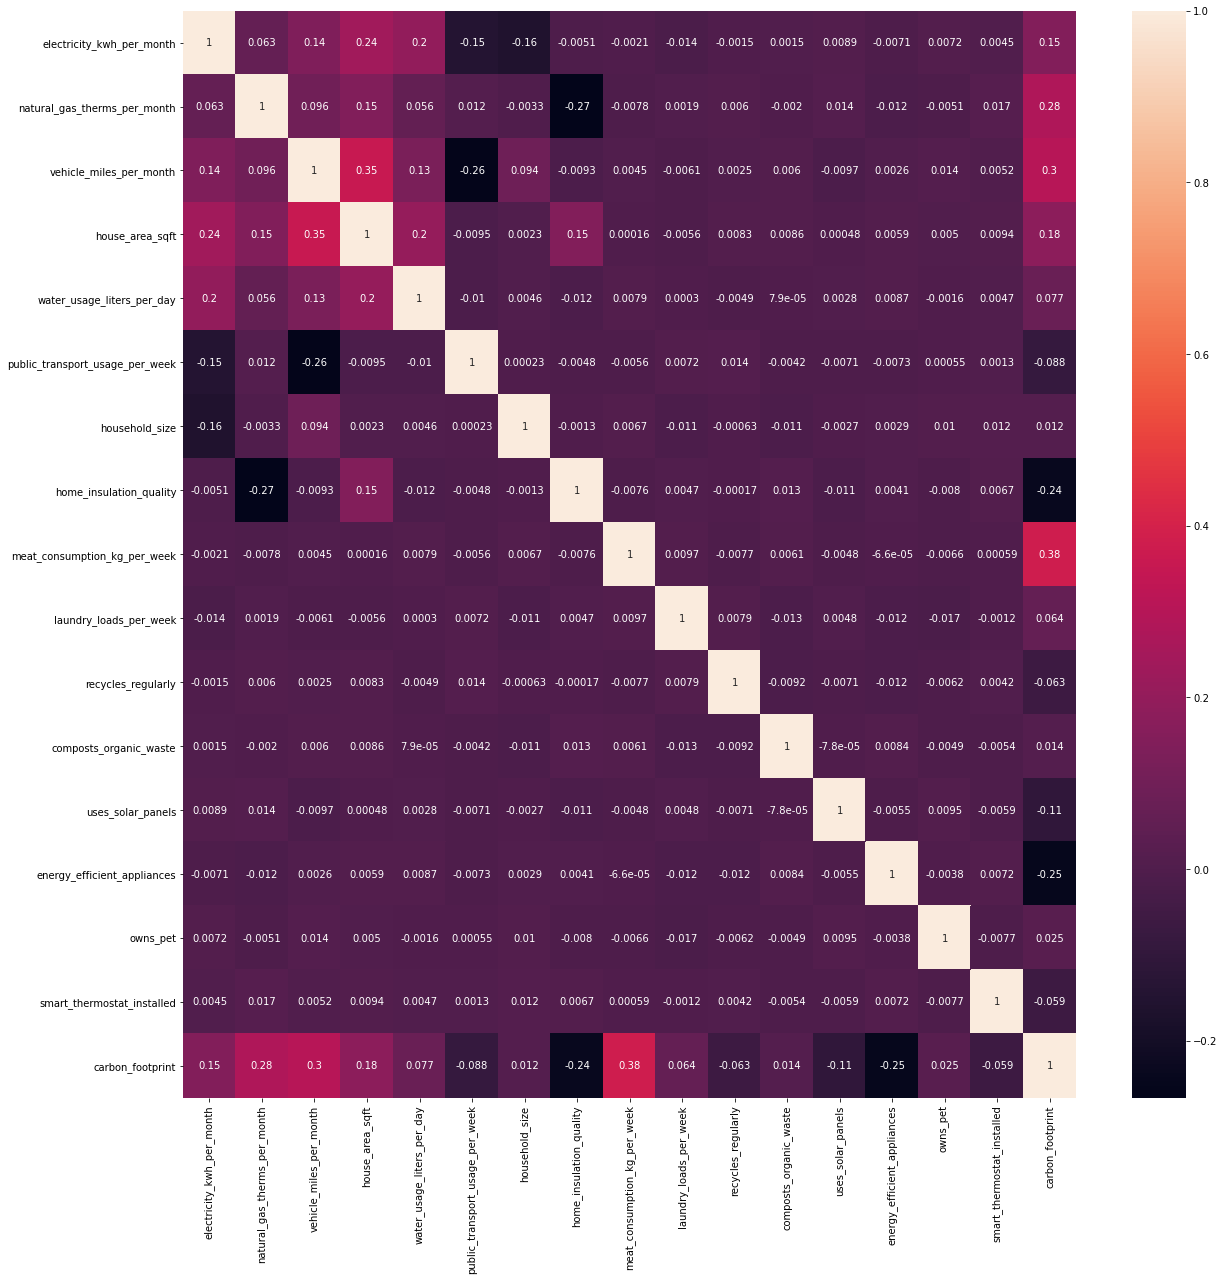

In [58]:
corr_matrix = df_numeric.corr(method = 'pearson')

fig,ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr_matrix,annot=True)

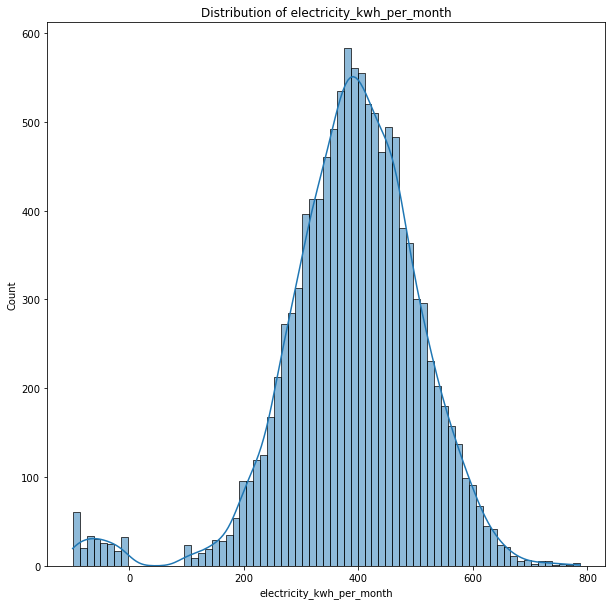

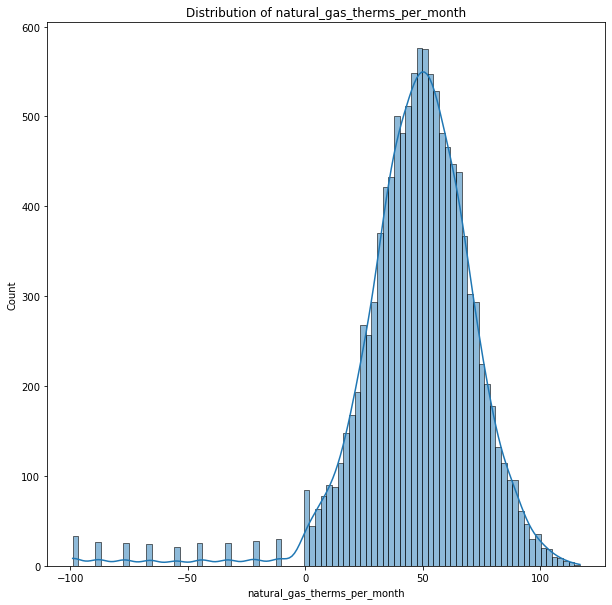

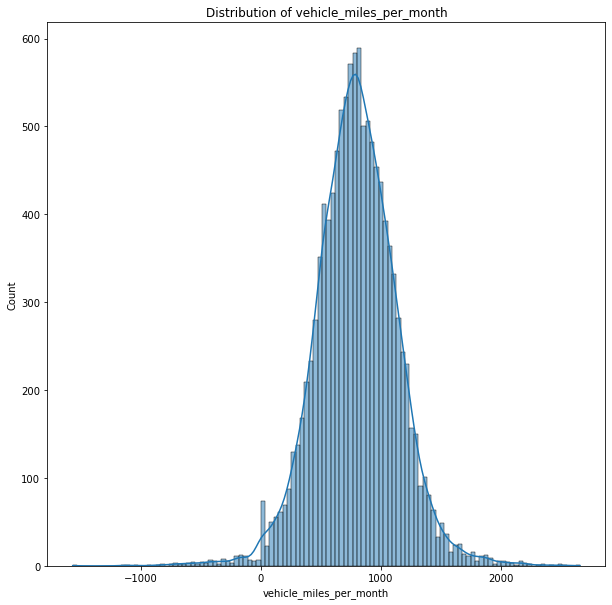

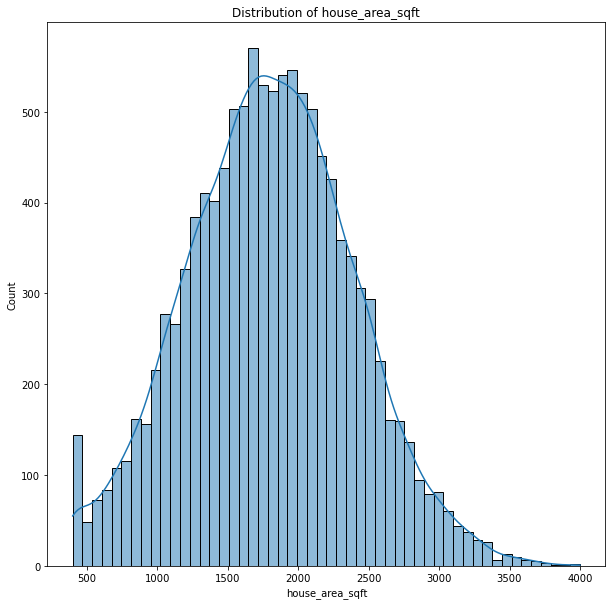

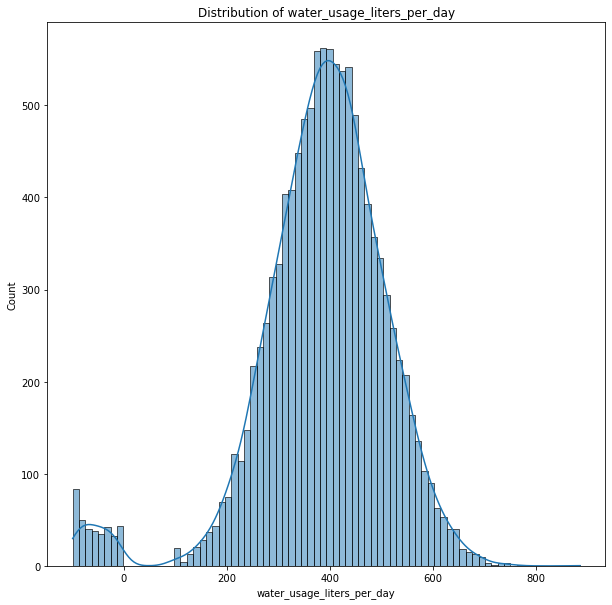

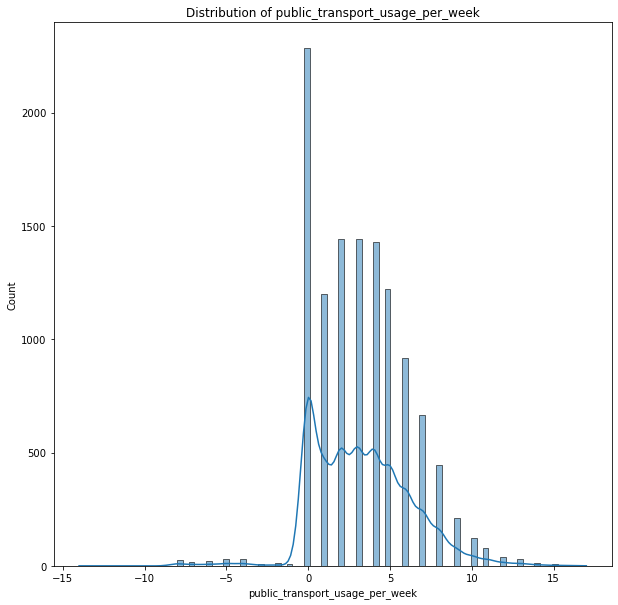

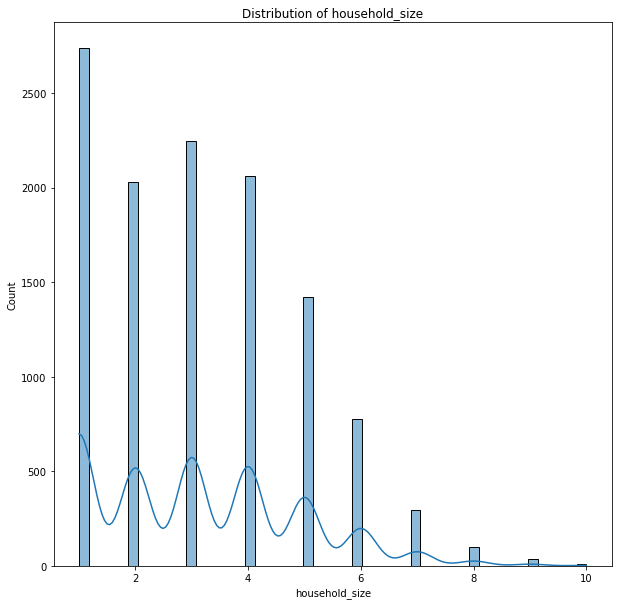

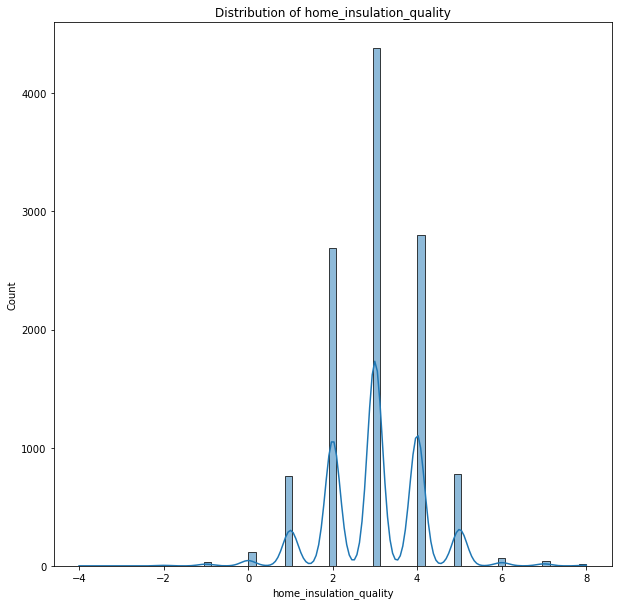

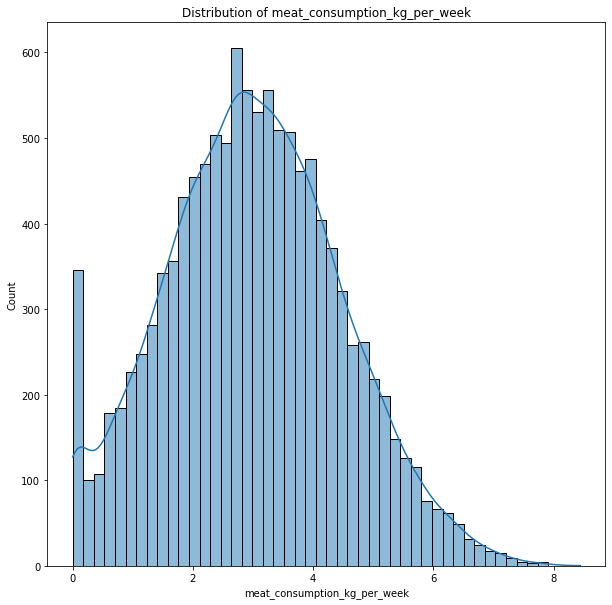

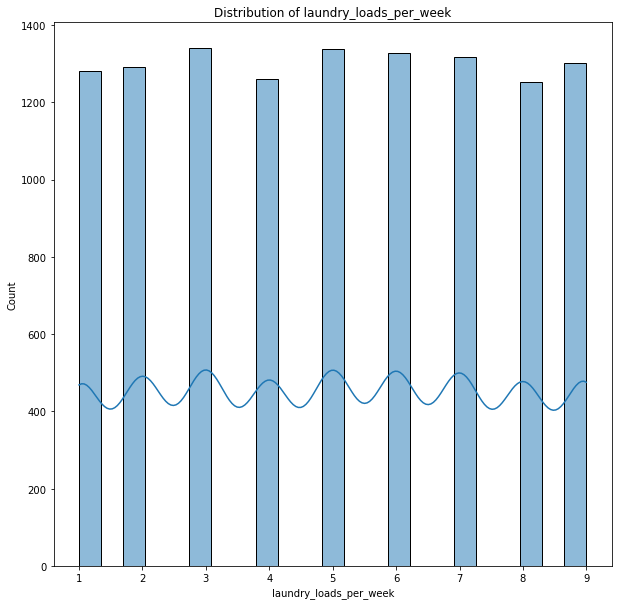

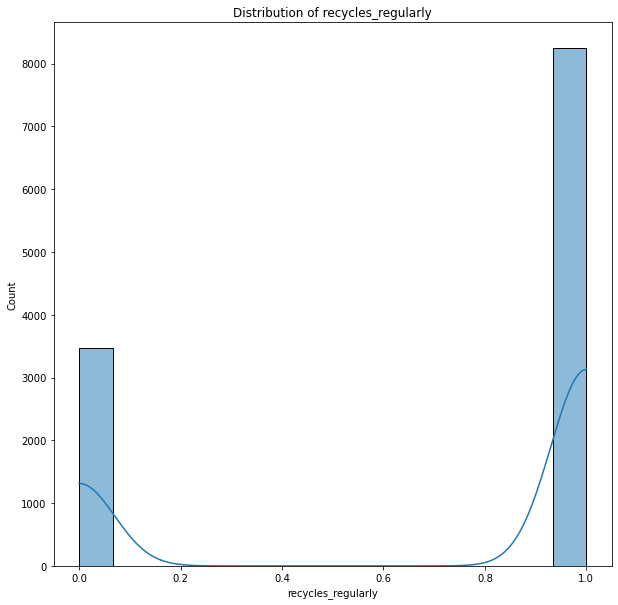

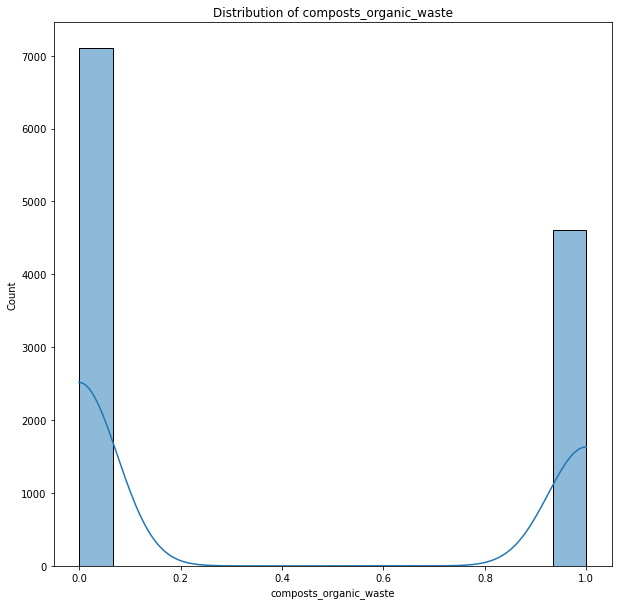

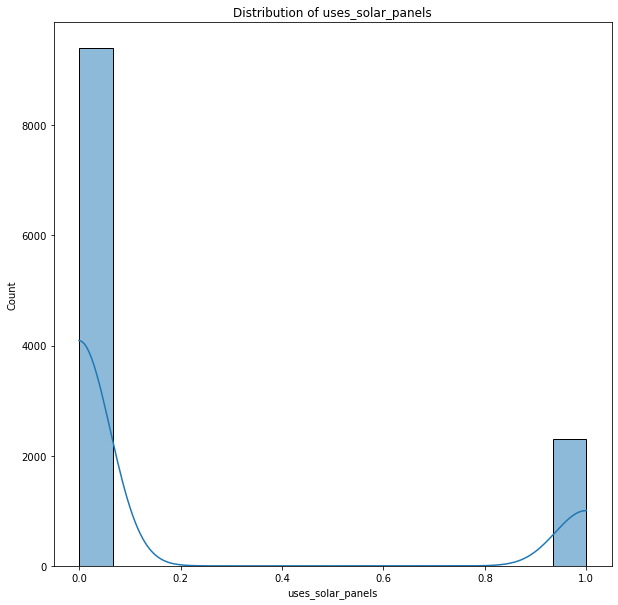

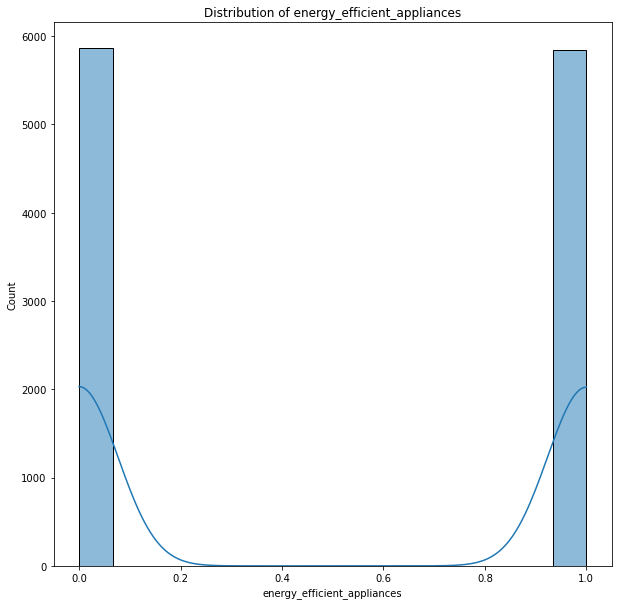

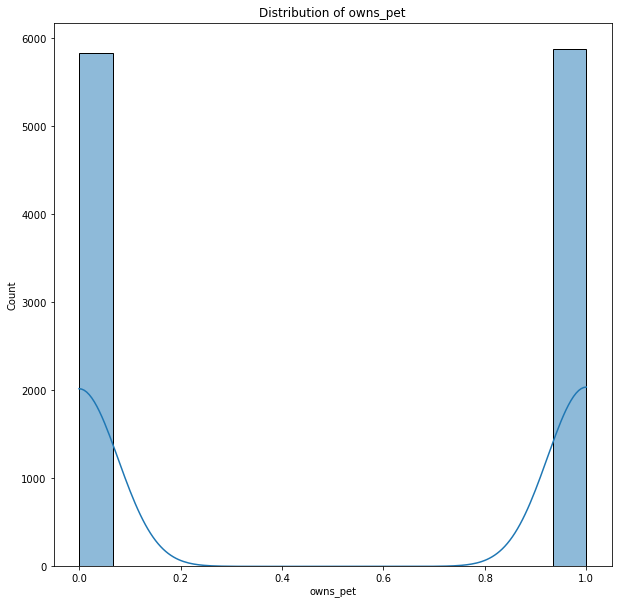

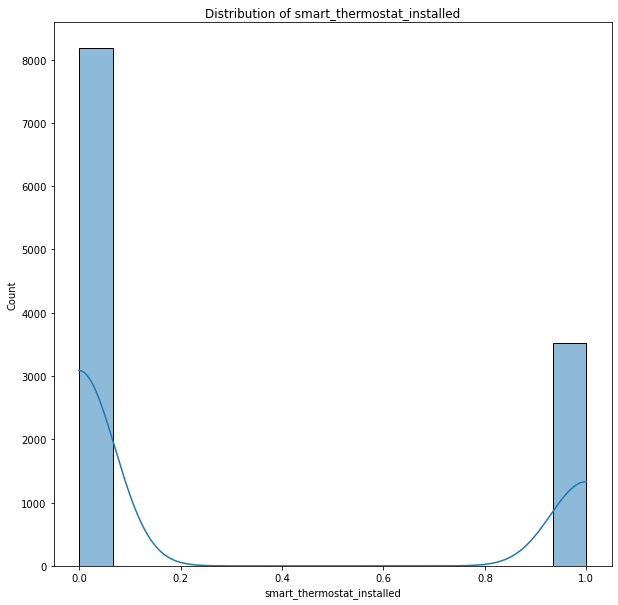

In [59]:
numerical_features = df_numeric.drop(axis=1,columns=['carbon_footprint'])
carbon_footprint = df_numeric['carbon_footprint']

for feature in numerical_features.columns:
    plt.figure(figsize=(10,10))
    sns.histplot(df_numeric[feature],kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

From the distribution plot above I've noticed electricity_kwh_per_month, natural_gas_therms_per_month,vehicle_miles_per_month, water_usage_liters_per_day, public_transport_usage_per_week and home_insulation_quality all have values below zero which doesn't make sense. I will drop the rows where these columns have values below zero 

In [63]:
columns_to_check = (df[['electricity_kwh_per_month', 'natural_gas_therms_per_month','vehicle_miles_per_month', 
'water_usage_liters_per_day', 'public_transport_usage_per_week','home_insulation_quality']] < 0).any(axis=1)

In [65]:
rows_below_zero = df[columns_to_check]

#dropping those rows
df.drop(axis=0,index=rows_below_zero.index,inplace=True)

In [67]:
df.describe()

,electricity_kwh_per_month,natural_gas_therms_per_month,vehicle_miles_per_month,house_area_sqft,water_usage_liters_per_day,public_transport_usage_per_week,household_size,home_insulation_quality,meat_consumption_kg_per_week,laundry_loads_per_week,recycles_regularly,composts_organic_waste,uses_solar_panels,energy_efficient_appliances,owns_pet,smart_thermostat_installed,carbon_footprint
count,10584.000000,10584.00000,10584.000000,10584.000000,10584.000000,10584.000000,10584.000000,10584.000000,10584.000000,10584.000000,10584.000000,10584.000000,10584.000000,10584.000000,10584.000000,10584.000000,10584.000000
mean,399.184011,49.69783,806.683665,1799.491896,399.950121,3.390967,3.146164,3.023054,3.003991,4.994331,0.703420,0.393519,0.198224,0.496788,0.502551,0.302438,776.697517
std,101.242659,19.88708,320.721202,589.361318,100.882592,2.791203,1.765066,1.100642,1.464534,2.565879,0.456771,0.488553,0.398680,0.500013,0.500017,0.459335,190.011354
min,100.000000,0.00000,0.000000,400.000000,100.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,310.000000
25%,329.857500,36.42000,593.947500,1395.705000,330.795000,1.000000,2.000000,2.000000,1.980000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,632.045000
50%,398.090000,49.65000,796.240000,1798.335000,398.760000,3.000000,3.000000,3.000000,2.980000,5.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,764.910000
75%,466.325000,63.02250,1004.990000,2191.930000,467.012500,5.000000,4.000000,4.000000,3.990000,7.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,907.437500
max,786.890000,114.41000,2657.531830,4000.000000,885.940000,17.000000,10.000000,8.000000,7.910000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1594.700000


In [69]:
df.columns

Index(['ID', 'electricity_kwh_per_month', 'natural_gas_therms_per_month',
       'vehicle_miles_per_month', 'house_area_sqft',
       'water_usage_liters_per_day', 'public_transport_usage_per_week',
       'household_size', 'home_insulation_quality',
       'meat_consumption_kg_per_week', 'laundry_loads_per_week',
       'recycles_regularly', 'composts_organic_waste', 'uses_solar_panels',
       'energy_efficient_appliances', 'heating_type', 'diet_type', 'owns_pet',
       'smart_thermostat_installed', 'carbon_footprint'],
      dtype='object')

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10584 entries, 1 to 13999
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               10584 non-null  object 
 1   electricity_kwh_per_month        10584 non-null  float64
 2   natural_gas_therms_per_month     10584 non-null  float64
 3   vehicle_miles_per_month          10584 non-null  float64
 4   house_area_sqft                  10584 non-null  float64
 5   water_usage_liters_per_day       10584 non-null  float64
 6   public_transport_usage_per_week  10584 non-null  int64  
 7   household_size                   10584 non-null  float64
 8   home_insulation_quality          10584 non-null  int64  
 9   meat_consumption_kg_per_week     10584 non-null  float64
 10  laundry_loads_per_week           10584 non-null  int64  
 11  recycles_regularly               10584 non-null  float64
 12  composts_organic_w

In [71]:
#first we will set the ID column as the index
df.set_index(keys='ID',inplace=True,verify_integrity=True)

#next we will encode the categorical columns
df = pd.get_dummies(data=df,columns=['heating_type','diet_type'])
df.head()


,electricity_kwh_per_month,natural_gas_therms_per_month,vehicle_miles_per_month,house_area_sqft,water_usage_liters_per_day,public_transport_usage_per_week,household_size,home_insulation_quality,meat_consumption_kg_per_week,laundry_loads_per_week,...,energy_efficient_appliances,owns_pet,smart_thermostat_installed,carbon_footprint,heating_type_electric,heating_type_gas,heating_type_none,diet_type_omnivore,diet_type_vegan,diet_type_vegetarian
ID,,,,,,,,,,,,,,,,,,,,,
0x3fdf,387.06,70.59,1280.85,1995.30,280.39,1,2.0,1,3.27,8,...,0.0,0,0.0,963.08,1,0,0,0,0,1
0x3b08,594.25,29.14,1005.72,2673.55,416.14,0,2.0,3,2.87,3,...,1.0,1,1.0,840.11,1,0,0,1,0,0
0x31e5,503.76,74.68,1049.46,2994.28,530.13,0,5.0,1,3.22,9,...,0.0,1,0.0,1252.42,1,0,0,1,0,0
0x576,397.74,36.29,1269.02,2185.57,292.05,0,4.0,4,2.36,9,...,0.0,1,0.0,971.11,0,1,0,1,0,0
0x382d,606.58,58.64,1116.80,1691.59,519.50,0,4.0,2,2.53,6,...,0.0,0,0.0,658.81,0,1,0,0,1,0


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10584 entries, 0x3fdf to 0x2dc0
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   electricity_kwh_per_month        10584 non-null  float64
 1   natural_gas_therms_per_month     10584 non-null  float64
 2   vehicle_miles_per_month          10584 non-null  float64
 3   house_area_sqft                  10584 non-null  float64
 4   water_usage_liters_per_day       10584 non-null  float64
 5   public_transport_usage_per_week  10584 non-null  int64  
 6   household_size                   10584 non-null  float64
 7   home_insulation_quality          10584 non-null  int64  
 8   meat_consumption_kg_per_week     10584 non-null  float64
 9   laundry_loads_per_week           10584 non-null  int64  
 10  recycles_regularly               10584 non-null  float64
 11  composts_organic_waste           10584 non-null  float64
 12  uses_solar_panels

In [73]:
df.columns

Index(['electricity_kwh_per_month', 'natural_gas_therms_per_month',
       'vehicle_miles_per_month', 'house_area_sqft',
       'water_usage_liters_per_day', 'public_transport_usage_per_week',
       'household_size', 'home_insulation_quality',
       'meat_consumption_kg_per_week', 'laundry_loads_per_week',
       'recycles_regularly', 'composts_organic_waste', 'uses_solar_panels',
       'energy_efficient_appliances', 'owns_pet', 'smart_thermostat_installed',
       'carbon_footprint', 'heating_type_electric', 'heating_type_gas',
       'heating_type_none', 'diet_type_omnivore', 'diet_type_vegan',
       'diet_type_vegetarian'],
      dtype='object')

In [80]:
#features
X = df.drop(axis=1,columns=['carbon_footprint'])
#target variable
y = df['carbon_footprint']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, refit=True, verbose=2, cv=5)

grid_search_rf.fit(X_train_scaled, y_train)

best_params_rf = grid_search_rf.best_params_

best_rf_model = grid_search_rf.best_estimator_

y_pred_best_rf = best_rf_model.predict(X_test_scaled)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50, total=   2.0s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50, total=   2.3s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50, total=   2.3s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50, total=   2.1s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50, total=   2.0s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   4.5s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, m

[Parallel(n_jobs=1)]: Done 1620 out of 1620 | elapsed: 84.2min finished


In [81]:
y_pred_best_rf = best_rf_model.predict(X_test_scaled)

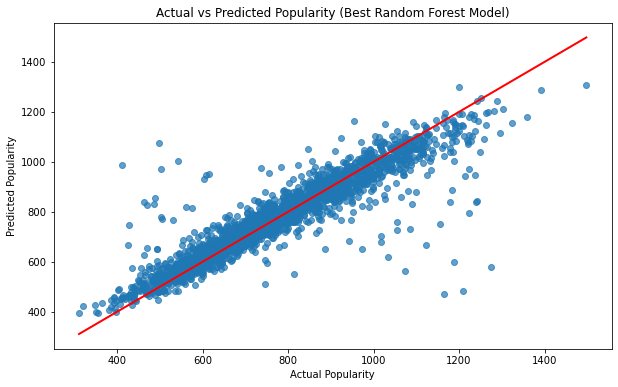

In [111]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best_rf, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')
plt.title('Actual vs Predicted Popularity (Best Random Forest Model)')
plt.show()

In [112]:
r2error = r2_score(y_pred_best_rf,y_test)
r2error

0.8002707499735058

In [113]:
mse = mean_squared_error(y_pred_best_rf,y_test)
mse

5841.812402738285

For the hackerearth carbon footprint competition dataset the following is the submission file.

In [83]:
test_data = pd.read_csv(r'test.csv')

In [86]:
test_data.columns

Index(['electricity_kwh_per_month', 'natural_gas_therms_per_month',
       'vehicle_miles_per_month', 'house_area_sqft',
       'water_usage_liters_per_day', 'public_transport_usage_per_week',
       'household_size', 'home_insulation_quality',
       'meat_consumption_kg_per_week', 'laundry_loads_per_week',
       'recycles_regularly', 'composts_organic_waste', 'uses_solar_panels',
       'energy_efficient_appliances', 'heating_type', 'diet_type', 'owns_pet',
       'smart_thermostat_installed'],
      dtype='object')

In [ ]:
test_data.set_index(keys='ID',inplace=True,verify_integrity=True)



KeyError: "None of ['ID'] are in the columns"

In [90]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6000 entries, 0x42e7 to 0x2e01
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   electricity_kwh_per_month        6000 non-null   float64
 1   natural_gas_therms_per_month     6000 non-null   float64
 2   vehicle_miles_per_month          6000 non-null   float64
 3   house_area_sqft                  6000 non-null   object 
 4   water_usage_liters_per_day       6000 non-null   float64
 5   public_transport_usage_per_week  6000 non-null   int64  
 6   household_size                   6000 non-null   object 
 7   home_insulation_quality          6000 non-null   int64  
 8   meat_consumption_kg_per_week     6000 non-null   float64
 9   laundry_loads_per_week           6000 non-null   int64  
 10  recycles_regularly               5821 non-null   float64
 11  composts_organic_waste           5800 non-null   float64
 12  uses_solar_panels 

In [91]:
# Getting rows with non-numeric values in house_area column
null_rows = pd.to_numeric(test_data['house_area_sqft'], errors='coerce').isna()
non_numeric_rows_house_area = test_data[null_rows]
# non_numeric_rows_house_area.index

#dropping the rows with non-numeric values for the house_area column
test_data.drop(axis=0,index=non_numeric_rows_house_area.index,inplace=True)

In [92]:
# Getting rows with non-numeric values in house_area column
null_rows = pd.to_numeric(test_data['household_size'], errors='coerce').isna()
non_numeric_rows_house_area = test_data[null_rows]
# non_numeric_rows_house_area.index

#dropping the rows with non-numeric values for the house_area column
test_data.drop(axis=0,index=non_numeric_rows_house_area.index,inplace=True)

In [88]:
#next we will encode the categorical columns
test_data_encoded = pd.get_dummies(data=test_data,columns=['heating_type','diet_type'])
test_data_encoded.head()

,electricity_kwh_per_month,natural_gas_therms_per_month,vehicle_miles_per_month,house_area_sqft,water_usage_liters_per_day,public_transport_usage_per_week,household_size,home_insulation_quality,meat_consumption_kg_per_week,laundry_loads_per_week,...,heating_type_|(L!D,heating_type_|fj?Y,heating_type_~$n@O,heating_type_~IRM@,heating_type_~MF#K,heating_type_~O6TJ,heating_type_~Qq/e,diet_type_omnivore,diet_type_vegan,diet_type_vegetarian
ID,,,,,,,,,,,,,,,,,,,,,
0x42e7,309.73,58.89,984.73,f)0*7,332.68,3,5,3,1.86,2,...,0,0,0,0,0,0,0,0,0,1
0x1950,278.49,48.47,841.76,1523.78,443.22,8,3,4,2.33,5,...,0,0,0,0,0,0,0,1,0,0
0x20e5,404.12,33.59,1219.33,1187.35,303.94,2,2,2,3.23,2,...,0,0,0,0,0,0,0,1,0,0
0x4378,324.74,41.93,562.96,647.43,496.58,2,1,3,4.01,7,...,0,0,0,0,0,0,0,1,0,0
0x1301,397.75,52.13,690.82,1576.17,346.56,0,5,4,2.23,6,...,0,0,0,0,0,0,0,1,0,0


In [93]:
#finding the rows without gas,electric or none
null_heating_type = test_data['heating_type'][test_data['heating_type'].str.contains('gas|electric|none') == False]

#dropping those rows
test_data['heating_type'] = test_data['heating_type'].drop(axis=0,index = null_heating_type.index)

In [95]:
final_test_encoded = pd.get_dummies(data=test_data,columns=['heating_type','diet_type'])
final_test_encoded.head()

,electricity_kwh_per_month,natural_gas_therms_per_month,vehicle_miles_per_month,house_area_sqft,water_usage_liters_per_day,public_transport_usage_per_week,household_size,home_insulation_quality,meat_consumption_kg_per_week,laundry_loads_per_week,...,uses_solar_panels,energy_efficient_appliances,owns_pet,smart_thermostat_installed,heating_type_electric,heating_type_gas,heating_type_none,diet_type_omnivore,diet_type_vegan,diet_type_vegetarian
ID,,,,,,,,,,,,,,,,,,,,,
0x1950,278.49,48.47,841.76,1523.78,443.22,8,3,4,2.33,5,...,0,1.0,0,0.0,1,0,0,1,0,0
0x20e5,404.12,33.59,1219.33,1187.35,303.94,2,2,2,3.23,2,...,0,0.0,0,0.0,0,1,0,1,0,0
0x4378,324.74,41.93,562.96,647.43,496.58,2,1,3,4.01,7,...,1,1.0,1,0.0,1,0,0,1,0,0
0x1301,397.75,52.13,690.82,1576.17,346.56,0,5,4,2.23,6,...,0,0.0,0,0.0,0,0,1,1,0,0
0x33b3,509.13,71.90,891.72,1339.81,523.61,1,1,3,4.85,1,...,1,1.0,1,0.0,0,1,0,0,1,0


In [97]:
final_test_encoded.isna().any()

electricity_kwh_per_month          False
natural_gas_therms_per_month       False
vehicle_miles_per_month            False
house_area_sqft                    False
water_usage_liters_per_day         False
public_transport_usage_per_week    False
household_size                     False
home_insulation_quality            False
meat_consumption_kg_per_week       False
laundry_loads_per_week             False
recycles_regularly                  True
composts_organic_waste              True
uses_solar_panels                  False
energy_efficient_appliances         True
owns_pet                           False
smart_thermostat_installed          True
heating_type_electric              False
heating_type_gas                   False
heating_type_none                  False
diet_type_omnivore                 False
diet_type_vegan                    False
diet_type_vegetarian               False
dtype: bool

In [98]:
#creating a list with the columns with missing values
cols_null_rows = list(final_test_encoded.isna().mean()[final_test_encoded.isna().mean() > 0].index)

#dropping the rows with null values
final_test_encoded.dropna(axis=0,subset=cols_null_rows,inplace=True)

In [99]:
test_pred = best_rf_model.predict(final_test_encoded)

array([1118.32839589, 1354.28315748])

In [109]:
results = pd.DataFrame({'id':final_test_encoded.index,
    'prediction': test_pred })

In [114]:
results[['id', 'prediction']].to_csv('submission.csv', index=False)